In [ ]:
!pip3 install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.10.0+cu111


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader


# Initial Model


 Loss for epoch  0 :  0.00527711272239685

 Accuracy for epoch  0 :  0.71195

 Loss for epoch  1 :  0.0051802945137023925

 Accuracy for epoch  1 :  0.91875

 Loss for epoch  2 :  0.005043349663416545

 Accuracy for epoch  2 :  0.9435

 Loss for epoch  3 :  0.005009744564692179

 Accuracy for epoch  3 :  0.95776665

 Loss for epoch  4 :  0.004969741503397624

 Accuracy for epoch  4 :  0.9676333

 Loss for epoch  5 :  0.004976052045822144

 Accuracy for epoch  5 :  0.9733833


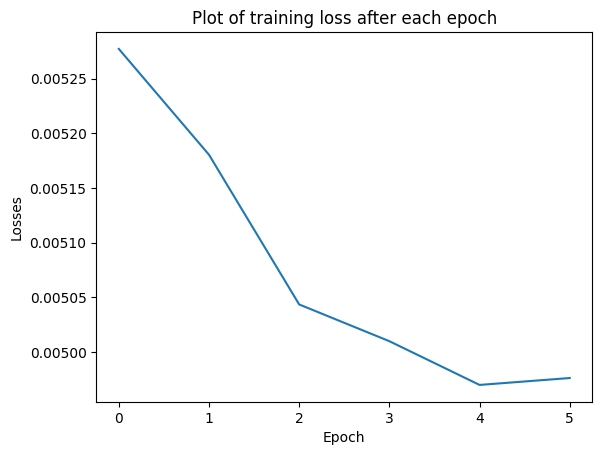

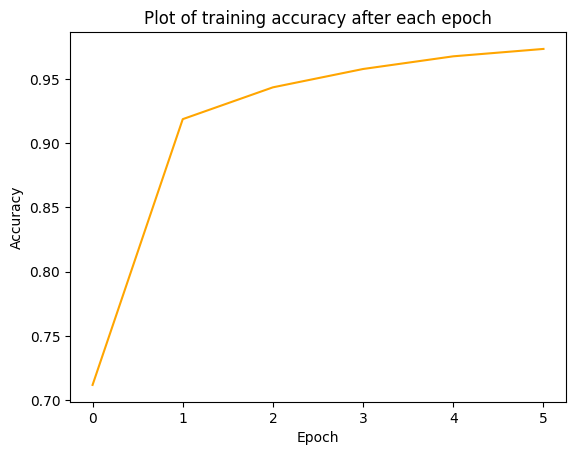

Final Testing Accuracy :  0.9753


In [ ]:

class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6,16, kernel_size = 5)
    self.conv3 = nn.Conv2d(16,120,kernel_size=5)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv3(x))
    x = x.view(x.size(0), -1)
    # x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc3(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)

# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct/total_test).numpy())

 Initial Accuracy achieved : ~97 %

 We will now try to optimize our model by changing some aspect such as the non-linear activation functions,

---

---



# Use different loss functions
### We use MSA loss instead of Cross Entropy Loss

<ipython-input-23-522e6da45df7>:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_label = F.one_hot(torch.tensor(labels))



 Loss for epoch  0 :  8.128582189480463e-05

 Accuracy for epoch  0 :  0.67728335

 Loss for epoch  1 :  5.652984604239464e-05

 Accuracy for epoch  1 :  0.9119

 Loss for epoch  2 :  5.761915196975072e-05

 Accuracy for epoch  2 :  0.9371167

 Loss for epoch  3 :  3.280779036382834e-05

 Accuracy for epoch  3 :  0.95318335

 Loss for epoch  4 :  2.9873028397560118e-05

 Accuracy for epoch  4 :  0.96216667

 Loss for epoch  5 :  1.8782817448178928e-05

 Accuracy for epoch  5 :  0.9683


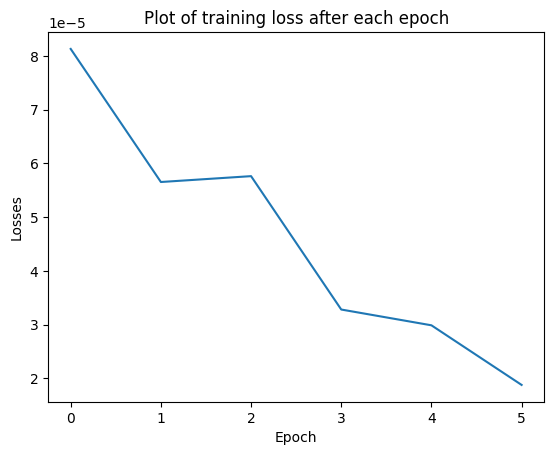

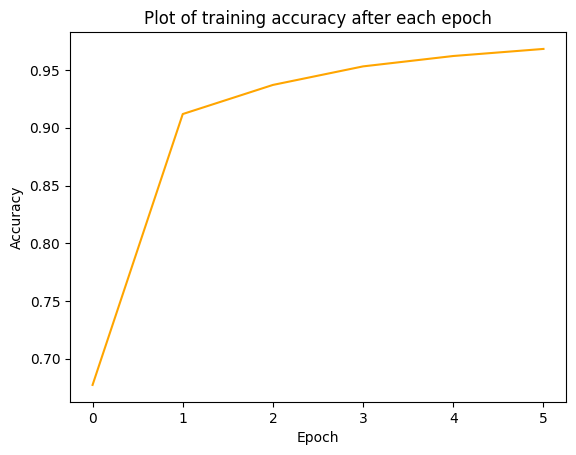

Final Testing Accuracy :  0.9704


In [ ]:

class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6,16, kernel_size = 5)
    self.conv3 = nn.Conv2d(16,120,kernel_size=5)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv3(x))
    x = x.view(x.size(0), -1)
    # x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc3(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    one_hot_label = F.one_hot(torch.tensor(labels))
    # print(one_hot_label)
    loss = criterion(outputs, one_hot_label)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)

# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct/total_test).numpy())

 Accuracy: 97.04 %

 Thoughts:

---
---

# Using ReLU activation function

### Used ReLU instead of Tanh for the convulation layers


 Loss for epoch  0 :  0.005431694984436035

 Accuracy for epoch  0 :  0.5734

 Loss for epoch  1 :  0.005277638832728068

 Accuracy for epoch  1 :  0.88491666

 Loss for epoch  2 :  0.00510428508122762

 Accuracy for epoch  2 :  0.92896664

 Loss for epoch  3 :  0.005023012161254883

 Accuracy for epoch  3 :  0.9540667

 Loss for epoch  4 :  0.0049794018268585205

 Accuracy for epoch  4 :  0.96498334

 Loss for epoch  5 :  0.004965168635050456

 Accuracy for epoch  5 :  0.97075


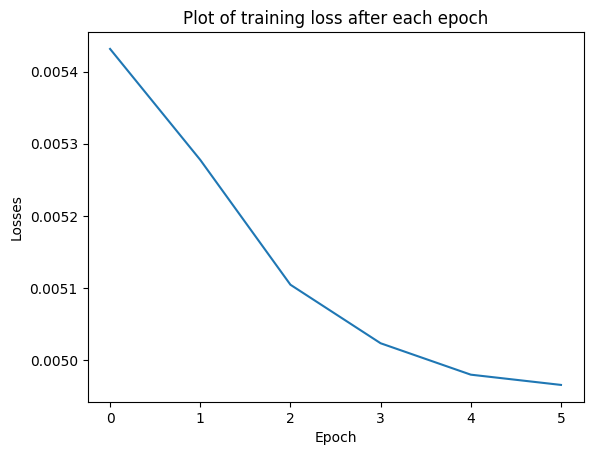

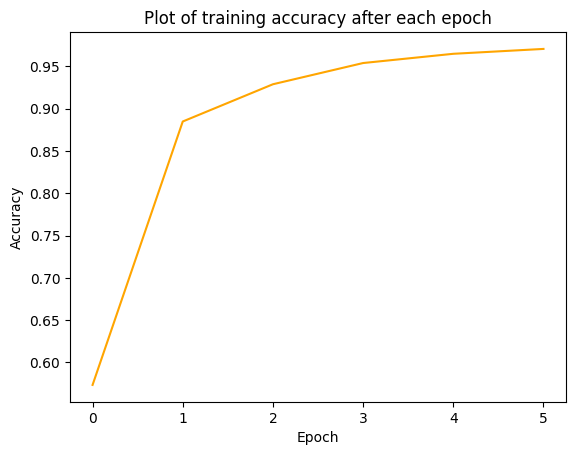

Final Accuracy :  tensor(0.9744)


In [ ]:

class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6,16, kernel_size = 5)
    self.conv3 = nn.Conv2d(16,120,kernel_size=5)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.relu(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.relu(self.conv3(x))
    x = x.view(x.size(0), -1)
    # x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc3(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',correct/total_test)

 Accuracy: 97.44


 Thoughts:

By chaning the non-linear actication funciton, we cannot see a significant change in the model accuracy.







---



---



# Changing the number of Convulation layers



## Added a fourth Conv2d layer with 40 output features, and used relu activation function


 Loss for epoch  0 :  0.005755674044291178

 Accuracy for epoch  0 :  0.46613333

 Loss for epoch  1 :  0.005611795981725057

 Accuracy for epoch  1 :  0.76996666

 Loss for epoch  2 :  0.005249908367792765

 Accuracy for epoch  2 :  0.85185

 Loss for epoch  3 :  0.005190588633219401

 Accuracy for epoch  3 :  0.91225

 Loss for epoch  4 :  0.0050190917650858565

 Accuracy for epoch  4 :  0.937

 Loss for epoch  5 :  0.005072943369547526

 Accuracy for epoch  5 :  0.95028335


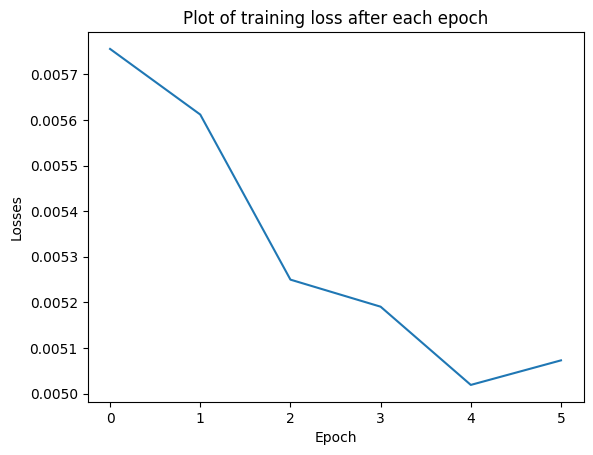

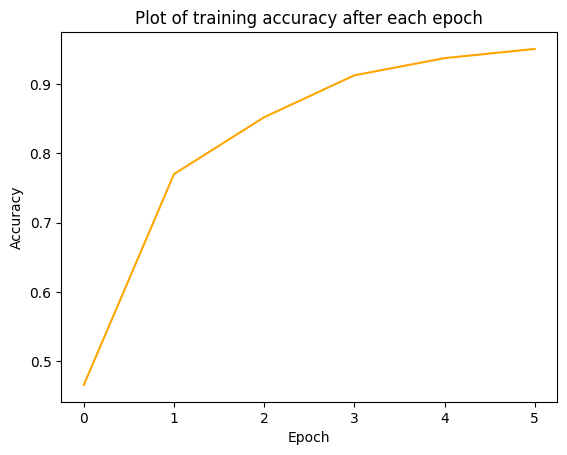

Final Testing Accuracy :  0.9584


In [ ]:

class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,6, kernel_size = 3)
    self.conv2 = nn.Conv2d(6,16, kernel_size = 3)
    self.conv3 = nn.Conv2d(16,40,kernel_size=3)
    self.conv4 = nn.Conv2d(40,120,kernel_size=3)
    self.fc1 = nn.Linear(1*1*120,120)
    self.fc2 = nn.Linear(120,80)
    self.fc3 = nn.Linear(80,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.relu(self.conv2(x))
    # print(x.shape)
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    # print(x.shape)
    x = F.relu(self.conv3(x))
    # print(x.shape)
    x = F.avg_pool2d(x, kernel_size = 2, stride = 1)
    # print(x.shape)
    x = F.relu(self.conv4(x))
    # print(x.shape)
    x = x.view(x.size(0), -1)
    # print(x.shape)
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc3(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)

# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct/total_test).numpy())


 Accuracy: 95.84 %



---


## Added a fourth Conv2d layer with 50 output features, and used tanh activation function

In [8]:


class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10,20, kernel_size = 5)
    self.conv3 = nn.Conv2d(20,50,kernel_size=5)
    self.conv4 = nn.Conv2d(50,150,kernel_size=5)
    self.fc1 = nn.Linear(5*5*150,150)
    self.fc2 = nn.Linear(150,70)
    self.fc3 = nn.Linear(70,10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.max_pool2d(x, kernel_size = 2, stride = 1)
    x = F.tanh(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 1)
    x = F.tanh(self.conv3(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv4(x))
    x = x.view(x.size(0), -1)
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc3(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)

# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct/total_test).numpy())


 Loss for epoch  0 :  0.005058058500289917

 Accuracy for epoch  0 :  0.8484167


KeyboardInterrupt: ignored

 Accuracy:  ~98.2%

 Thoughts:
This is the best performing model yet. Increasing the input channels and the number of convolution layers seems to have helped the model make more accurate prediction.

Increasing the number of convolution layers (depth of the model) and the number of channels (width of the model) leads to capturing more complex patterns in the data;this could be attributed to having more data points to work with.

This could also lead to overfitting. Hence, the balance has to be carefully maintained.

---
---

# Stack different number of FC layers


## 2 FC layers

In [3]:
class MNISTDataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((32,32)),
         transforms.ToTensor()])

    self.train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class Lenet(torch.nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(1,10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10,20, kernel_size = 5)
    self.conv3 = nn.Conv2d(20,50,kernel_size=5)
    self.conv4 = nn.Conv2d(50,150,kernel_size=5)
    self.fc1 = nn.Linear(5*5*150,80)
    self.fc2 = nn.Linear(80,10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.max_pool2d(x, kernel_size = 2, stride = 1)
    x = F.tanh(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 1)
    x = F.tanh(self.conv3(x))
    x = F.avg_pool2d(x, kernel_size = 2, stride = 2)
    x = F.tanh(self.conv4(x))
    x = x.view(x.size(0), -1)
    x = F.tanh(self.fc1(x))
    #x = F.tanh(self.fc2(x))
    x = F.softmax(self.fc2(x, ),dim = -1)
    return x


# MAIN PROGRAM
data_obj = MNISTDataset()
model = Lenet()

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 600
num_epochs = 6
total_train = 60000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  for images,labels in dataloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct/total_train).numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append(correct/total_train)

# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
#for epoch,loss in zip(list(range(num_epochs)),all_losses):
#    plt.text(epoch, loss+500, str(int(loss)))
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
#for epoch,accuracy in zip(list(range(num_epochs)),all_accuracies):
#    plt.text(epoch, accuracy+500, str(int(accuracy)))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:

    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct/total_test).numpy())

NameError: ignored

 Accuracy:

 Thoughts:

---

## 4 FC layers

 Accuracy:

 Thoughts:

---
---

# UNDERSTANDING PARTS OF THE CODE

transforms.Compose is a function that allows you to chain multiple image transformations together.

transforms.ToTensor() converts images into PyTorch tensors. The pixel values of the image are scaled to the range [0, 1].

transforms.Normalize((0.5,), (0.5,)) normalizes the pixel values of the images to have a mean of 0.5 and a standard deviation of 0.5. This operation shifts the values to be in the range [-1, 1], which is often used in deep learning models.

These transformations are applied to each image in the dataset during loading to ensure that the data is in the correct format and is properly normalized for training neural networks.






